Question 1: What is a Convolutional Neural Network (CNN), and how does it differ from
traditional fully connected neural networks in terms of architecture and performance on
image data?

In [ ]:
'''
A Convolutional Neural Network (CNN) is a type of deep learning model designed to understand visual patterns directly from images.
Instead of looking at all pixels at once (like fully connected networks do),
CNNs learn small patterns first, then build up to bigger and more complex ones.
How CNNs differ from fully connected networks-
CNN:-
It uses convolution + pooling with local connections
PArameters are fewer due to shared filters
Automatically learns spatial hierarchies
Performance on images is	Highly accurate, efficient, less overfitting
Fully Connected Network (FCN):-
Every neuron connects to every input
Extremely high, especially for large images
Does not capture spatial structure
Performance on Image is Inefficient, slow, prone to overfitting
'''

Question 2: Discuss the architecture of LeNet-5 and explain how it laid the foundation
for modern deep learning models in computer vision. Include references to its original
research paper.

In [ ]:
'''
LeNet-5, introduced by Yann LeCun et al. in 1998 (“Gradient-Based Learning Applied to Document Recognition”), is one of the earliest successful
CNN architectures and a foundation for modern computer vision models.
LeNet-5 Architecture:-
Input: 32*32 grayscale image
C1 – Convolution: 6 feature maps, 5*5 filters
S2 – Subsampling (Avg Pooling): Reduces spatial size
C3 – Convolution: 16 feature maps
S4 – Subsampling: Further downsampling
C5 – Convolution: Produces 120 feature maps
F6 – Fully Connected: 84 neurons
Output Layer: 10-class classifier (originally digits)
How LeNet-5 Shaped Modern CNNs
Introduced convolution + pooling blocks, the blueprint for modern CNNs.
Used weight sharing, reducing parameters and improving generalization.
Demonstrated end-to-end learning for image recognition, influencing models like AlexNet, VGG, ResNet, and beyond.
'''


Question 3: Compare and contrast AlexNet and VGGNet in terms of design principles,
number of parameters, and performance. Highlight key innovations and limitations of
each

In [ ]:
'''
AlexNet and VGGNet both advanced image classification, but they differ in depth, design simplicity, and parameter size.
AlexNet (2012)
Design: 8 layers (5 conv + 3 FC), large filters (11×11, 5×5).
Params: ~60M.
Performance: Won ImageNet 2012 by a large margin.
Key Innovations: ReLU activation, dropout, data augmentation, and GPU training.
Limitations: Large filters, high memory use, relatively shallow by modern standards.
VGGNet (2014)
Design: 16–19 layers, very small 3×3 filters stacked deeply for better feature extraction.
Params: ~138M (much larger due to deep FC layers).
Performance: Improved ImageNet accuracy over AlexNet with a cleaner, more uniform architecture.
Key Innovations: Simple, modular design that became a template for later networks.
Limitations: Extremely heavy, slow to train, and memory-intensive.
'''

Question 4: What is transfer learning in the context of image classification? Explain
how it helps in reducing computational costs and improving model performance with
limited data.

In [ ]:
'''
Transfer learning in image classification means using a model pre-trained on a large dataset (like ImageNet)
and adapting it to a new, smaller task. Instead of training from scratch, the model’s learned features—edges, textures, shapes—are reused.
Why it reduces computational cost
Most of the heavy training is already done.
Only the final layers or a small portion of the network need retraining.
Requires far fewer iterations and less GPU time.
Why it improves performance with limited data
The model starts with strong, general visual features.
Reduces overfitting because it doesn’t rely solely on small datasets.
Achieves higher accuracy even when training samples are scarce.
'''


Question 5: Describe the role of residual connections in ResNet architecture. How do
they address the vanishing gradient problem in deep CNNs?

In [ ]:
'''
Residual connections in ResNet allow layers to learn a residual function by adding the input of a block directly to its output (a skip connection).
How they help:-
Gradients can flow through the skip path without shrinking, reducing the vanishing gradient problem.
Deep networks become easier to optimize because layers only learn small adjustments instead of full transformations.
Enables very deep models (50–152 layers) to train effectively.
'''

Question 6: Implement the LeNet-5 architectures using Tensorflow or PyTorch to
classify the MNIST dataset. Report the accuracy and training time.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

In [ ]:
train_data = datasets.MNIST('.', train=True, download=True, transform=transform)
test_data = datasets.MNIST('.', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.71MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 125kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.18MB/s]


In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
start = time.time()
for epoch in range(5):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()

train_time = time.time() - start

In [ ]:
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = outputs.argmax(1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print("Accuracy:", accuracy)
print("Training time:", train_time, "seconds")

Accuracy: 0.9875
Training time: 148.1860761642456 seconds


Question 7: Use a pre-trained VGG16 model (via transfer learning) on a small custom
dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.
Include your code and result discussion.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
import pathlib
data_dir = pathlib.Path(data_dir)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
print("Loading data...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Loading data...
Found 3670 files belonging to 1 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 1 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Classes found: {class_names}")

Classes found: ['flower_photos']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

In [ ]:
base_model = VGG16(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')

In [ ]:
base_model.trainable = False

print("\nBase model loaded. Top layers removed.")
base_model.summary()


Base model loaded. Top layers removed.


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = models.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
print("\nStarting Fine-Tuning phase...")
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:15]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

In [ ]:
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

In [ ]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Question 8: Write a program to visualize the filters and feature maps of the first
convolutional layer of AlexNet on an example input image.


In [ ]:
import torch, torchvision.models as m, torchvision.transforms as t
import matplotlib.pyplot as plt, requests
from PIL import Image
from io import BytesIO

In [ ]:
alexnet = m.alexnet(weights='DEFAULT').eval()
conv1 = alexnet.features[0] # Access the first Convolutional Layer
url = "https://images.dog.ceo/breeds/retriever-golden/n02099601_100.jpg"
img = Image.open(BytesIO(requests.get(url).content)).convert('RGB')

In [ ]:
tf = t.Compose([t.Resize((224,224)), t.ToTensor(), t.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
input_tensor = tf(img).unsqueeze(0)

In [ ]:
f_maps = conv1(input_tensor)[0].detach() # Output shape: [64, 55, 55]
weights = conv1.weight.data

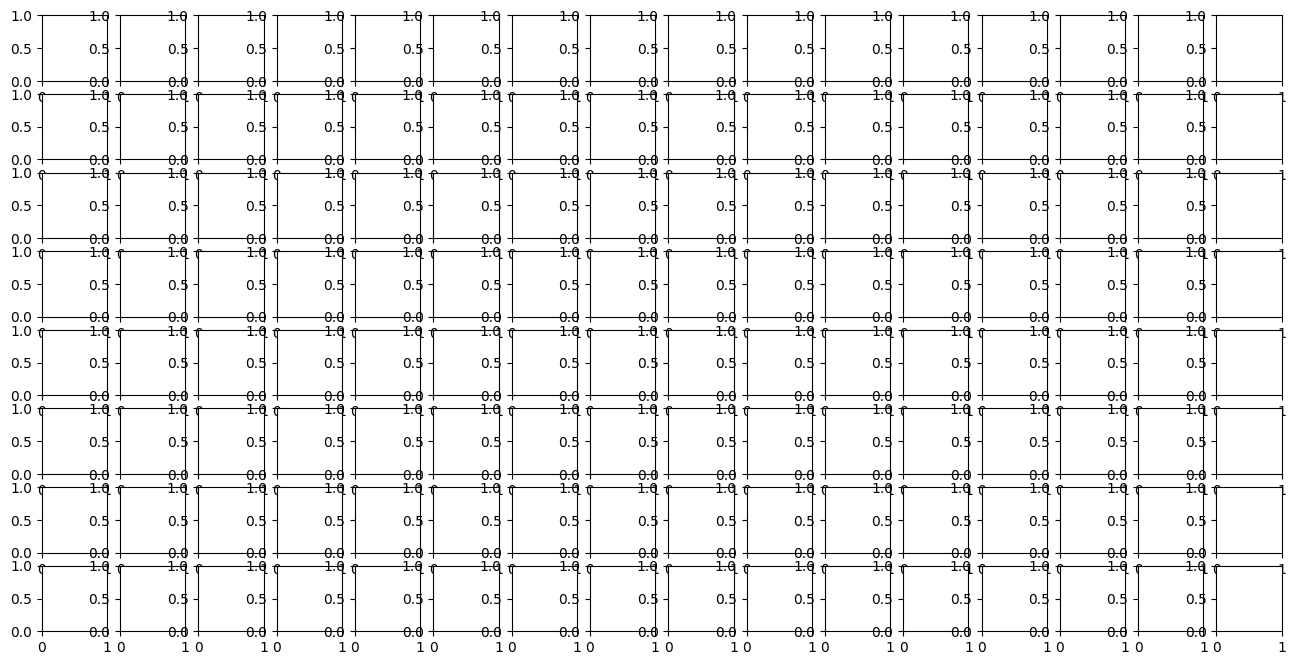

In [ ]:
fig, axs = plt.subplots(8, 16, figsize=(16, 8))
weights = (weights - weights.min()) / (weights.max() - weights.min()) # Normalize weights 0-1 for display


In [ ]:
for i in range(64):
    # Plot Filters (Left side)
    axs[i//8, i%8].imshow(weights[i].permute(1,2,0))
    axs[i//8, i%8].axis('off')

    # Plot Feature Maps (Right side)
    axs[i//8, i%8 + 8].imshow(f_maps[i], cmap='viridis')
    axs[i//8, i%8 + 8].axis('off')

plt.suptitle("Left: Learned Filters (Kernels) | Right: Feature Maps (Activations)")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Question 9: Train a GoogLeNet (Inception v1) or its variant using a standard dataset
like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
overfitting or underfitting.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as d, torchvision.transforms as t, torchvision.models as m
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


In [5]:


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10(root='./data', train=True,
                              transform=transform, download=True)
test_data  = datasets.CIFAR10(root='./data', train=False,
                              transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader   = DataLoader(test_data, batch_size=64, shuffle=False)


In [6]:
model = models.googlenet(pretrained=False, aux_logits=True)
model.fc = nn.Linear(1024, 10)   # CIFAR-10 → 10 classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_acc_list = []
val_acc_list = []

for epoch in range(20):
    model.train()
    correct = total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs, aux1, aux2 = model(images)  # GoogLeNet has aux outputs
        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux1, labels)
        loss3 = criterion(aux2, labels)
        loss = loss1 + 0.3*(loss2 + loss3)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = correct / total
    train_acc_list.append(train_acc)

    # validation
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = correct / total
    val_acc_list.append(val_acc)

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")


In [ ]:
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GoogLeNet on CIFAR-10")
plt.legend()
plt.show()

Question 10: You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use

In [ ]:
'''
For classifying medical X-ray images with limited labeled data, the most effective approach is
transfer learning using a pre-trained CNN, such as ResNet50 or InceptionV3.
1. Transfer Learning
   Use a model pre-trained on ImageNet to leverage its learned low- and mid-level features (edges, textures, shapes).
   Replace the top classifier layer with a new dense layer matching your classes: Normal, Pneumonia, COVID-19.
   Freeze the majority of the base network initially, training only the new top layers on your dataset.
   Optionally, fine-tune the last few layers to adapt high-level features to X-ray images.
2. Why ResNet50 or InceptionV3
   ResNet50: Uses residual connections, making it easier to train deeper networks and avoid vanishing gradients.
   InceptionV3: Efficiently captures multi-scale features, helpful for detecting patterns at different resolutions.
   Both are proven for medical imaging tasks and perform well even with small datasets when combined with augmentation.
3. Data Handling
   Use data augmentation (rotation, flipping, intensity scaling) to artificially expand the dataset.
   Apply normalization and ensure consistent image size (e.g., 224×224 for ResNet50).
   Optionally, use cross-validation for robust performance estimation.
Deployment Strategy
1. Model Export
   Save the trained model in TensorFlow SavedModel or PyTorch TorchScript format.

2. API Layer
   Build a REST API using FastAPI or Flask to serve predictions.
   Input: X-ray image; Output: predicted class probabilities.

3. Web/Cloud Deployment
   Deploy the API to cloud services (AWS, GCP, Azure) or on-prem servers.
   Use GPU-enabled instances if real-time inference is required.

4. Monitoring & Updates
   Track prediction accuracy and input distribution to detect drift.
   Retrain periodically as more labeled data becomes available.
'''